## Assignment 3
### Name: Saikat Moi
### Roll Number: 20CS10050

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# Metadata
#print(spambase.metadata)

# Variable information
#print(spambase.variables)

# Loading as a dataframe
x = spambase.data.features
y = spambase.data.targets


## Part A: SVM Implementation

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regularization_params = [0.001, 0.1, 1, 10, 100]
accuracy_results = []

In [6]:
for C in regularization_params:
    # Initialize and train the SVM model with a linear kernel
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = svm_model.predict(X_test)
    
    # Calculate accuracy and store it in the results list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results.append(accuracy)

c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\valid

In [7]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


   C (Regularization Parameter)  Accuracy
0                         0.001  0.865364
1                         0.100  0.925081
2                         1.000  0.922910
3                        10.000  0.918567
4                       100.000  0.913138


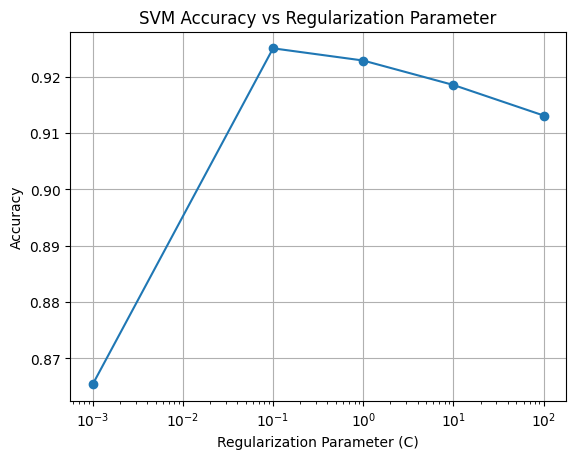

In [8]:
results_df = pd.DataFrame({'C (Regularization Parameter)': regularization_params, 'Accuracy': accuracy_results})
print(results_df)

# Plot the results
plt.figure()
plt.semilogx(regularization_params, accuracy_results, marker='o', linestyle='-')
plt.title('SVM Accuracy vs Regularization Parameter')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

## Part B: Kernel Tricks

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
kernels = ['poly', 'poly', 'sigmoid', 'rbf']
degrees = [2, 3, None, None]
results = []

In [10]:
for kernel, degree in zip(kernels, degrees):
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=degree)
    else:
        svm_model = SVC(kernel=kernel)


    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    result = {
        'Kernel': kernel,
        'Degree': degree if degree is not None else "N/A",
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    results.append(result)


c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\valid

In [11]:
# Convert the results to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

    Kernel Degree  Accuracy  Precision    Recall  F1 Score
0     poly      2  0.649294   0.876404  0.200000  0.325678
1     poly      3  0.625407   0.868852  0.135897  0.235033
2  sigmoid    N/A  0.635179   0.573770  0.538462  0.555556
3      rbf    N/A  0.662324   0.661224  0.415385  0.510236


## Part C: Overfitting & Underfitting Analysis

In [12]:
experiments = [
    {'Degree': 1, 'C': 0.01},
    {'Degree': 1, 'C': 100},
    {'Degree': 3, 'C': 0.01},
    {'Degree': 3, 'C': 100}
]

train_accuracy = []
test_accuracy = []

In [13]:
for experiment in experiments:
    degree = experiment['Degree']
    C = experiment['C']

    svm_model = SVC(kernel='poly', degree=degree, C=C)
    svm_model.fit(X_train, y_train)
    train_acc = svm_model.score(X_train, y_train)
    test_acc = svm_model.score(X_test, y_test)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)


results_df = pd.DataFrame(experiments)
results_df['Train Accuracy'] = train_accuracy
results_df['Test Accuracy'] = test_accuracy

c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Saikat Moi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\valid

In [14]:
print(results_df)

   Degree       C  Train Accuracy  Test Accuracy
0       1    0.01        0.663587       0.621064
1       1  100.00        0.784511       0.760043
2       3    0.01        0.651359       0.611292
3       3  100.00        0.699728       0.660152


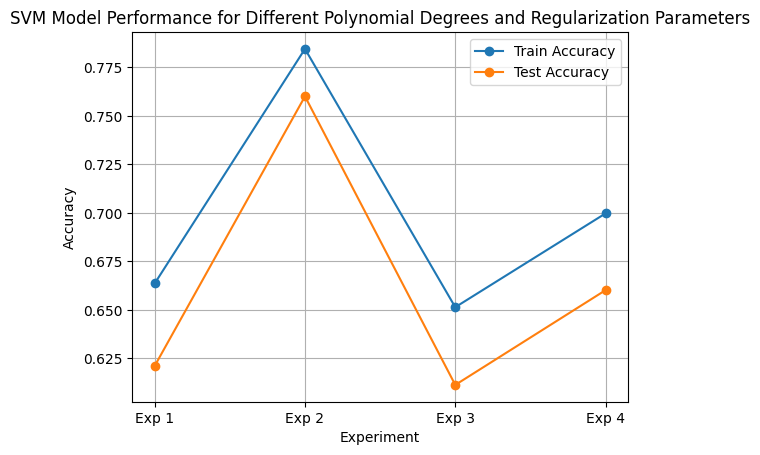

In [15]:
plt.figure()
plt.plot(range(1, len(experiments) + 1), train_accuracy, marker='o', label='Train Accuracy')
plt.plot(range(1, len(experiments) + 1), test_accuracy, marker='o', label='Test Accuracy')
plt.xticks(range(1, len(experiments) + 1), [f'Exp {i}' for i in range(1, len(experiments) + 1)])
plt.title('SVM Model Performance for Different Polynomial Degrees and Regularization Parameters')
plt.xlabel('Experiment')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()